# Problema das Furadeiras
####(contrato diario)

A empresa precisa contratar a menor quantidade de furadeiras possível.

In [ ]:
#Importar
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importar biblioteca
import pandas as pd
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

##Especificações

A empresa precisa contratar a menor quantidade de furadeiras possível.
Cada furadeira pode ficar em posse da empresa por 5 dias antes de ir para a manutenção que dura dois dias. Então uma furadeira alugada na segunda é operada de segunda a sexta, ficando sábado e domingo na manutenção. Além disso, cada dia é necessário certa quantidade de furadeiras para o bom funcionamento da empresa, sendo:
 
- Na segunda precisam de no mínimo 15 furadeiras
- Na terça precisam de no mínimo 13
- Na quarta precisam de no mínimo 15
- Na quinta precisam de no mínimo 17
- Na sexta precisam de no mínimo 12
- No sábado precisam de no mínimo 13
- No domingo precisam de no mínimo 11.
 
As variáveis de decisão são
 
- x1 -> Furadeira iniciada na Segunda
- x2 -> Furadeira iniciada na Terça
- x3 -> Furadeira iniciada na Quarta
- x4 -> Furadeira iniciada na Quinta
- x5 -> Furadeira iniciada na Sexta
- x6 -> Furadeira iniciada na Sábado
- x7 -> Furadeira iniciada na Domingo
 
Usando as restrições da manutenção de dois dias chega-se as seguintes funções:


Minimizacao: $x1 + x2 + x3 + x4 + x5 + x6 + x7 = z$
<br>

Segunda: $x1 + x4 + x5 + x6 + x7 \leq 15$
<br>

Terça: $x1 + x2 + x5 + x6 + x7 \leq 13$
<br>

Quarta: $x1 + x2 + x3 + x6 + x7 \leq 15$
<br>

Quinta: $x1 + x2 + x3 + x4 + x7 \leq 17$
<br>

Sexta: $x1 + x2 + x3 + x4 + x5 \leq 12$
<br>

Sábado: $x2 + x3 + x4 + x5 + x6 \leq 13$
<br>

Domingo: $x3 + x4 + x5 + x6 + x7 \leq 11$


As funcoes de restricoes sao assim pois cada linha nos mostra quais furadeiras podem operar em determinado dia, por exemplo:

Segunda feira usa-se as furadeiras contratadas na segunda, domingo, sabado, sexta e quinta.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/7 periodo/PO/Prova/furadeiras_Semanal.csv")
df

,Unnamed: 0,v_Segunda,v_Terca,v_Quarta,v_Quinta,v_Sexta,v_Sabado,Domingo,Unnamed: 8
0,NaN,x1,x2,x3,x4,x5,x6,x7,Minimo de Furadeiras
1,Variavel,1,1,1,1,1,1,1,NaN
2,Segunda,1,0,0,1,1,1,1,15
3,Terca,1,1,0,0,1,1,1,13
4,Quarta,1,1,1,0,0,1,1,15
5,Quinta,1,1,1,1,0,0,1,17
6,Sexta,1,1,1,1,1,0,0,12
7,Sabado,0,1,1,1,1,1,0,13
8,Domingo,0,0,1,1,1,1,1,11


In [ ]:
#Funcao de Minimizacao
z = df.iloc[1, 1:-1].to_numpy(dtype="float32")
z

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
#Limites superiores
A_liminf = df.iloc[2:9, 1:8].to_numpy(dtype="float32")
A_liminf

array([[1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
b_inf = df.iloc[2:9, 8].to_numpy(dtype="float32")
b_inf

array([15., 13., 15., 17., 12., 13., 11.], dtype=float32)

Para o bom funcionamento da funcao em Python deve-se multiplicar o vetor b e a matriz A_liminf, por "-1", visto q sao limites inferiores e a funcao de minimizacao so aceita os superiores.


In [ ]:
A_limsup =  A_liminf*-1
b_sup = b_inf*-1

Definir os valores limites de furadeiras em cada dia.

In [ ]:
x1_lim = (0,None)
x2_lim = (0,None)
x3_lim = (0,None)
x4_lim = (0,None)
x5_lim = (0,None)
x6_lim = (0,None)
x7_lim = (0,None)
limites = np.array([x1_lim,x2_lim,x3_lim,x4_lim,x5_lim,x6_lim,x7_lim])

Aplicar funcao de minimizacao

In [ ]:
#Aplicar Funcao 
res = linprog(z, A_ub = A_limsup, b_ub = b_sup, bounds = limites,
              method = 'simplex')
res

     con: array([], dtype=float64)
     fun: 20.0
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([0., 2., 0., 0., 2., 0., 0.])
  status: 0
 success: True
       x: array([4., 5., 0., 5., 0., 3., 3.])

Com essa saida pode observar que precisarao de 20 furadeiras no contrato, sendo 4 contratadas na segunda, 5 terca, 5 quinta, 3 no sabado e 3 no domingo.

<BarContainer object of 7 artists>

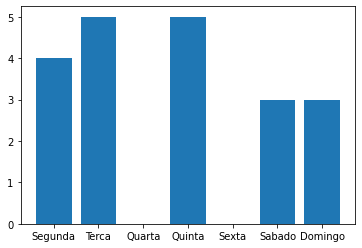

In [ ]:
dias = np.array(["Segunda","Terca","Quarta","Quinta","Sexta","Sabado","Domingo"])


fig = plt.bar
plt.bar(dias, res.x)
